<a href="https://colab.research.google.com/github/WayneGretzky1/CSCI-4521-Applied-Machine-Learning/blob/main/bye00035Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [440]:
import pandas as pd
import numpy as np


1. Data Preparation

In [441]:
college_df = pd.read_csv("https://raw.githubusercontent.com/be-prado/csci4521/main/College.csv")


In [442]:
Top10perc = college_df["Top10perc"]
college_df["Elite"] = Top10perc.apply(lambda x: "Elite" if x >= 50 else "Non-Elite")
cols_zscore = ['PhD', 'perc.alumni', 'Grad.Rate', 'Expend']
scaled_college_df = college_df.copy()
scaled_college_df[cols_zscore] = scaled_college_df[cols_zscore].apply(lambda x: (x - x.mean()) / x.std()) # Normalized data

2. Data Visualization

In [443]:
import seaborn as sns
import matplotlib.pyplot as plt

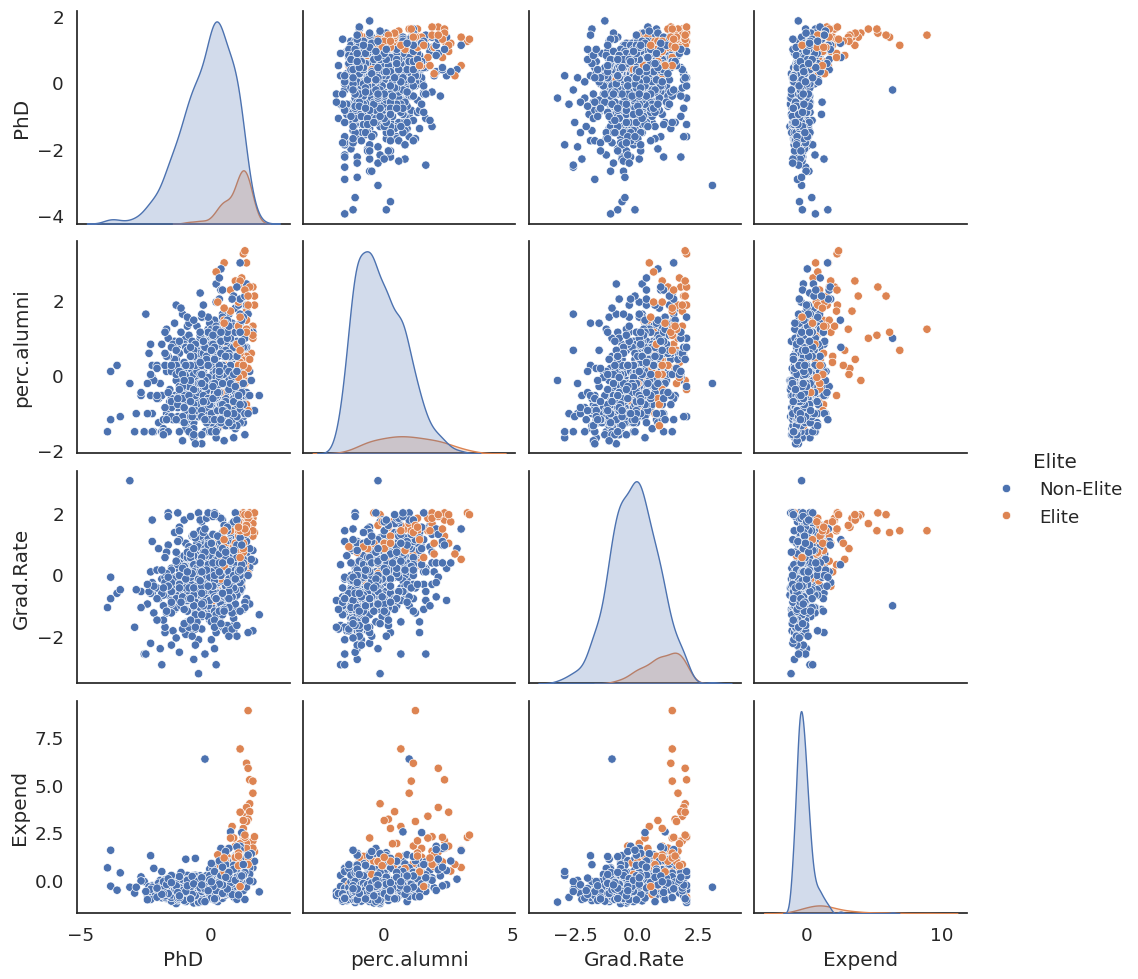

In [444]:
sns.pairplot(scaled_college_df, vars=['PhD', 'perc.alumni', 'Grad.Rate', 'Expend'], hue='Elite')


3. Data Analysis

Based on the plots from Q2, there is evidence to suggest that there is a correlation between some of the features and Elite/Non-Elite schools.
- None of the features look tightly correlated to each other, no colinearity
- Each feature is normalized (z-score)

Distributions and mean
- PhD:
Elite mean is significantly right of Non-Elite. Elite variance is smaller (tightly clustered) than Non-Elite, this suggests a that the PhD is a strong feature in distinguishing between them.
- perc.alumni: Elite mean is right of Non-Elite
- Grad.Rate: Elite mean is significantly right of Non-Elite, this suggests a that the Grad.Rate is a strong feature in distinguishing between them.
- Expend: Elite mean is slightly right of Non-Elite

Looking at the visualizations, I notice the following:
- Expend: Higher expend schools tend to be Elite
- Grad.Rate: Lower grad rate schools tend to be Non-Elite
- perc.alumni: Higher perc.alumni schools tend to be Elite
- PhD: Higher PhD schools tend to be Elite

Strategies for improvement:
- I would suggest that schools focus on higher percentage of faculty with PhDs, have a strong alumni network to encourage donations, increase instructional expenditure per student, and focus on student success to increase graduation rates.


4. Model Evaluation

- Category 1. KNN with a small k (11)
- Category 2. A classifier that predicts all schools are Elite


In [445]:
def train_test_split(X,y,test_percent):
  numRows = y.size                     #number or rows in the entire dataset
  splitPoint = int((1-test_percent)*numRows)  #the row index test_size% of the way through
  p = np.random.permutation(numRows)   #array for shuffling data
  X = X[p]
  y = y[p]

  #Training data array
  X_train = X[:splitPoint]  # training features
  y_train = y[:splitPoint]  # training labels

  #Testing data array
  X_test = X[splitPoint:]  # testing features
  y_test = y[splitPoint:] # testing labels

  return X_train, X_test, y_train, y_test

In [446]:
def precision(classify, X_train, y_train, X_test, y_test):
  pred = classify(X_train, y_train, X_test)

  pred = np.array(pred)
  y_test = np.array(y_test)

  true_positives = np.sum((pred == 1) & (y_test == 1))
  false_positives = np.sum((pred == 1) & (y_test != 1))

  if true_positives + false_positives == 0:
      return 0.0

  precision_score = true_positives / (true_positives + false_positives)
  return precision_score

In [447]:
def precision_on_train(classify, X_train, y_train):
    return precision(classify, X_train, y_train, X_train, y_train)

def precision_on_test(classify, X_train, y_train, X_test, y_test):
    return precision(classify, X_train, y_train, X_test, y_test)


In [448]:
def recall(classify, X_train, y_train, X_test, y_test):
  pred = classify(X_train, y_train, X_test)

  pred = np.array(pred)
  y_test = np.array(y_test)

  true_positives = np.sum((pred == 1) & (y_test == 1))
  false_negatives = np.sum((pred == 0) & (y_test == 1))

  if true_positives + false_negatives == 0:
      return 0.0

  recall_score = true_positives / (true_positives + false_negatives)
  return recall_score

In [449]:
def recall_on_train(classify, X_train, y_train):
    return recall(classify, X_train, y_train, X_train, y_train)

def recall_on_test(classify, X_train, y_train, X_test, y_test):
    return recall(classify, X_train, y_train, X_test, y_test)


In [450]:
def accuracy(classify, X_train, y_train, X_test, y_test):
  pred = classify(X_train, y_train, X_test)
  correct_pred = (pred == y_test)
  total_preds = y_test.size
  return correct_pred.sum()/total_preds

In [451]:
def accuracy_on_train(classify, X_train, y_train):
    return accuracy(classify, X_train, y_train, X_train, y_train)

def accuracy_on_test(classify, X_train, y_train, X_test, y_test):
    return accuracy(classify, X_train, y_train, X_test, y_test)


In [452]:
def avg_accuracy(classifier, X, y, count = 200, split=0.33):
  acc = 0
  for _ in range(0,count):
    X_train, X_test, y_train, y_test = train_test_split(X,y,split)
    acc += accuracy(classifier, X_train, y_train, X_test, y_test)
  return acc/count

In [453]:
def f1(classify, X_train, y_train, X_test, y_test):
  prec = precision(classify, X_train, y_train, X_test, y_test)
  recall_score = recall(classify, X_train, y_train, X_test, y_test)
  f1_score = (2 * prec * recall_score) / (prec + recall_score)
  return f1_score

In [454]:
def f1_on_train(classify, X_train, y_train):
    return f1(classify, X_train, y_train, X_train, y_train)

def f1_on_test(classify, X_train, y_train, X_test, y_test):
    return f1(classify, X_train, y_train, X_test, y_test)


In [455]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier


In [456]:
def knn_classifier(k):
    def knn_classify(x_train, y_train, x_test):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(x_train, y_train)
        return knn.predict(x_test)

    return knn_classify

In [457]:
# Create a classifier that always predicts "Elite", which is 1
def constant_classifier(const):
  def constant_classify(x_train, y_train, x_test):
    model = DummyClassifier(strategy="constant", constant=const)
    model.fit(x_train, y_train)
    return model.predict(x_test)

  return constant_classify

In [458]:
X = scaled_college_df[ ['PhD', 'perc.alumni', 'Grad.Rate', 'Expend'] ].to_numpy()
y = scaled_college_df['Elite'].to_numpy()
y = (scaled_college_df['Elite'] == 'Elite').astype(int).to_numpy()


In [459]:
#Create a train/test split where 1/3 of the data is used for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, 0.33)

# Run both models
knn = knn_classifier(3)
constant = constant_classifier(1) # Elite is 1, Non-Elite is 0

In [460]:
knn_precision_train = precision_on_train(knn, x_train, y_train)
knn_precision_test = precision_on_test(knn, x_train, y_train, x_test, y_test)
const_precision_train = precision_on_train(constant, x_train, y_train)
const_precision_test = precision_on_test(constant, x_train, y_train, x_test, y_test)
print("Knn precision train", knn_precision_train)
print("Knn precision test", knn_precision_test)
print("Constant classifier precision train", const_precision_train)
print("Constant classifier precision test", const_precision_test)

Knn precision train 0.8936170212765957
Knn precision test 0.42857142857142855
Constant classifier precision train 0.11923076923076924
Constant classifier precision test 0.08171206225680934


In [461]:
knn_recall_train = recall_on_train(knn, x_train, y_train)
knn_recall_test = recall_on_test(knn, x_train, y_train, x_test, y_test)
const_recall_train = recall_on_train(constant, x_train, y_train)
const_recall_test = recall_on_test(constant, x_train, y_train, x_test, y_test)
print("Knn recall train", knn_recall_train)
print("Knn recall test", knn_recall_test)
print("Constant classifier recall train", const_recall_train)
print("Constant classifier recall test", const_recall_test)

Knn recall train 0.6774193548387096
Knn recall test 0.42857142857142855
Constant classifier recall train 1.0
Constant classifier recall test 1.0


In [462]:
knn_accuracy_train = accuracy_on_train(knn, x_train, y_train)
knn_accuracy_test = accuracy_on_test(knn, x_train, y_train, x_test, y_test)
const_accuracy_train = accuracy_on_train(constant, x_train, y_train)
const_accuracy_test = accuracy_on_test(constant, x_train, y_train, x_test, y_test)
print("Knn accuracy train", knn_accuracy_train)
print("Knn accuracy test", knn_accuracy_test)
print("Constant classifier accuracy train", const_accuracy_train)
print("Constant classifier accuracy test", const_accuracy_test)

Knn accuracy train 0.9519230769230769
Knn accuracy test 0.9066147859922179
Constant classifier accuracy train 0.11923076923076924
Constant classifier accuracy test 0.08171206225680934


In [463]:
knn_f1_train = f1_on_train(knn, x_train, y_train)
knn_f1_test = f1_on_test(knn, x_train, y_train, x_test, y_test)
const_f1_train = f1_on_train(constant, x_train, y_train)
const_f1_test = f1_on_test(constant, x_train, y_train, x_test, y_test)
print("Knn f1 train", knn_f1_train)
print("Knn f1 test", knn_f1_test)
print("Constant classifier f1 train", const_f1_train)
print("Constant classifier f1 test", const_f1_test)

Knn f1 train 0.7706422018348622
Knn f1 test 0.42857142857142855
Constant classifier f1 train 0.21305841924398627
Constant classifier f1 test 0.1510791366906475


In [464]:
# Test different amounts of neighbors with the cross-validation
knn_avg_accuracy = avg_accuracy(knn, X, y, split = 0.33)
const_avg_accuracy = avg_accuracy(constant, X, y, split = 0.33)
print("Knn avg_accuracy", knn_avg_accuracy)
print("Constant classifier avg_accuracy", const_avg_accuracy)

Knn avg_accuracy 0.9106614785992201
Constant classifier avg_accuracy 0.1081128404669258


Analysis

```
Model        Precision  Recall  Accuracy  F1
KNN train    0.76       0.61    0.94      0.68
KNN test     0.83       0.32    0.91      0.48
Const train  0.1        1       0.1       0.18
Const test   0.12       1       0.12      0.21
```


KNN performed best on the training and test data on precision, accuracy, and f1. Const peformed worst on training data with the exception of Recall. The recall score is 1 for Const because all predicted "Elite" schools are elite, and the model doesn't have false negatives.

The Constant classifier is a very simple model, only predicting "Elite", and is bad to use for actual machine learning and prediction.

- KNN's precision score looks shows a little sign of underfitting and generalizes well from train to test. Of the Elite schools the KNN predicted, 83% were actually Elite. It cautiously predicts Elite schools.
- KNN's Recall score shows risk of overfitting because of a 30% drop off between train to test. KNN predicted 32% of actual Elite schools, meaning it struggles in predicting Elite schools and has a high true negative rate.
- KNN's Accuracy score is solid and shows little sign of overfitting, 89% of predictions were correct
- KNN's F1 score of 48% is low for both false positives and negatives, but still higher than the recall score. This suggests that the KNN struggles at predicting Elite schools, but is fine with predicting Non-Elite schools.

KNN is a good model becuase of its generalizaiton and bias-variance balance. The constant classifier is a model that is a baseline, at minimum any other model should be better than the this. I would recommend that KNN be used for real-world applciations for the purposes of prediction, and use constant classifier as a baseline to help reality-check the KNN model.

The reason I chose the four features ("Grad Rate", "PhD", "Expend", "perc. alumni") becuase none of them share colinearity, and each seem to have the least amount of external factors to potentially skew the data (Cost related from state funding, accessibility, anything non-academic related)


5. Applying the Model

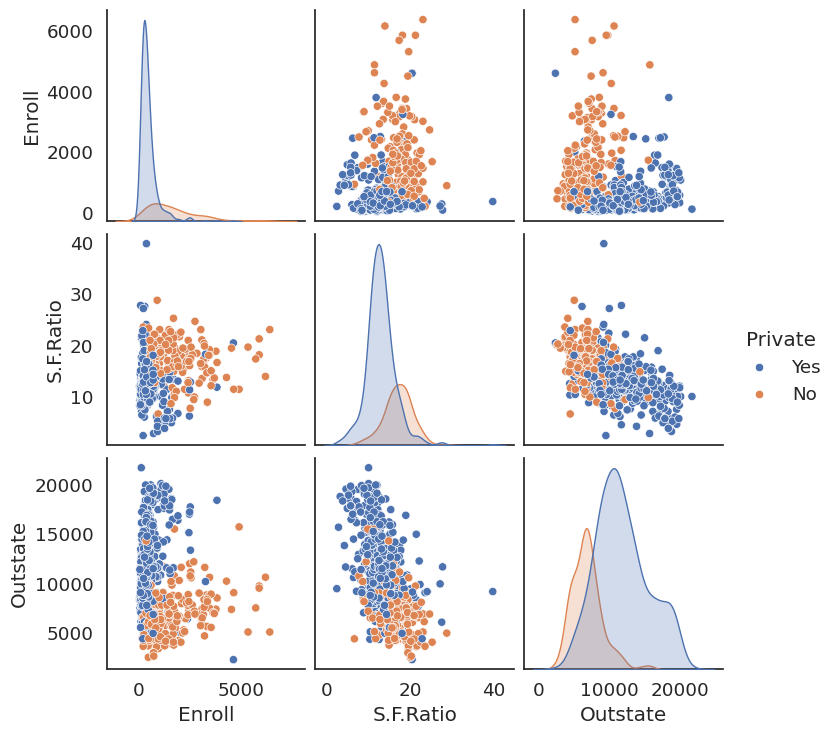

In [465]:
sns.pairplot(scaled_college_df, vars=['Enroll', 'S.F.Ratio', 'Outstate'], hue='Private')


I expect this school to be Private because of the combination of its small enrollment (Enroll), high tuition (Outstate), and Low S.F.Ratio.

Looking at the distributions
- Private Enroll mean is less than Public
- Private S.F. mean is less than Public
- Private Outstate mean is much higher than Public



In [466]:
# TODO: lets make another graph but this time lets compute the accuracy for both training and testing sets for different Ks
ks = np.arange(1,51,2)
test_acc_list = []
train_acc_list = []

for k in ks:
  my_knn = knn_classifier(k)
  test_acc = 0
  train_acc = 0
  for _ in range(20): # avg over 20 train-test splits
    X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
    test_acc += accuracy(my_knn, X_train, y_train, X_test, y_test) / 20
    train_acc += accuracy(my_knn, X_train, y_train, X_train, y_train) / 20
  train_acc_list.append(train_acc)
  test_acc_list.append(test_acc)


<Axes: xlabel='k', ylabel='value'>

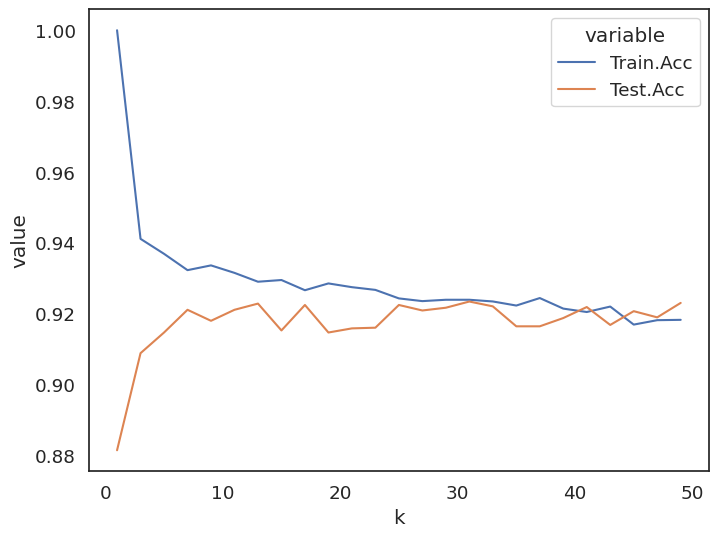

In [467]:
# helper for making a graph nicely
from pylab import rcParams
sns.set(font_scale=1.2)
sns.set_style("white") #whitegrid white dark darkgrid

rcParams['figure.figsize'] = 8, 6
result = pd.DataFrame( {"k":ks,"Train.Acc":train_acc_list,"Test.Acc":test_acc_list} )
pd.melt(result, ['k'])
sns.lineplot(x="k",y="value", hue='variable', data=pd.melt(result, ['k']))

In [468]:
mystery_college = pd.DataFrame({
    "Private": ["Yes"],
    "Apps": [5000],
    "Accept": [2000],
    "Enroll": [800],
    "Top10perc": [55],
    "Top25perc": [80],
    "F.Undergrad": [3500],
    "P.Undergrad": [500],
    "Outstate": [20000],
    "Room.Board": [9000],
    "Books": [500],
    "Personal": [2000],
    "PhD": [80],
    "Terminal": [85],
    "S.F.Ratio": [12],
    "perc.alumni": [25],
    "Expend": [15000],
    "Grad.Rate": [90]
})

In [469]:
from sklearn.preprocessing import StandardScaler
features = ["PhD", "perc.alumni", "Expend", "Grad.Rate"]
# Train data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(college_df[features])  # normalized

y = college_df['Elite'].to_numpy()
y = (college_df['Elite'] == 'Elite').astype(int).to_numpy()

# Test data
mystery_scaled = scaler.transform(mystery_college[features]) # normalized

In [470]:
knn = knn_classifier(20)
pred = knn(X_scaled, y, mystery_scaled)
print("The mystery college is:", "Non-Elite" if pred[0] == 0 else "Elite")

The mystery college is: Non-Elite


In [471]:
print("Mystery college z-scores", mystery_scaled)

Mystery college z-scores [[0.44980564 0.18218227 1.02326796 1.42932232]]


In [473]:
scaled_college_df[features].describe()


,PhD,perc.alumni,Expend,Grad.Rate
count,7.770000e+02,7.770000e+02,7.770000e+02,7.770000e+02
mean,7.315755e-17,-3.657878e-17,1.371704e-16,3.703601e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.960045e+00,-1.835398e+00,-1.239843e+00,-3.228796e+00
25%,-6.528742e-01,-7.863172e-01,-5.571237e-01,-7.255519e-01
50%,1.432966e-01,-1.407291e-01,-2.457350e-01,-2.697219e-02
75%,7.557356e-01,6.662561e-01,2.240292e-01,7.298225e-01
max,1.858126e+00,3.329307e+00,8.918976e+00,3.058422e+00


- I used the following features: ["PhD", "perc.alumni", "Expend", "Grad.Rate"]
- KNN that best minimizes error rate is between 11-20 (depicted in the graph above), I picked a number within that range (20). The process was done through computing the accuracy for both training and testing sets for different Ks and picking a point where both training and test errors were minimized.
- Preprocessing, I ensured that the training (college data) and test (mystery school) features were normalized though StandardScaler and scaler.transform.


I predict that this school is "Non-Elite", however, my model is cautious about predicting Elite (low recall).

Extra Credit

When I adjust the PhD from 80 to 89, the mystery school becomes Elite. I think it is because PhD is a strong distinguishing feature of Elite vs Non-Elite. The distributions of Elite and Non-Elite schools in PhD is significant, in terms of mean being higher for Elite schools and hovering around 88. This would push my model to label this school as Elite since the school is already strongly above average in Expend and Grad Rate.

